<a href="https://colab.research.google.com/github/hsaar/Python25Study/blob/main/02_01_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도학습은 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습함
비지도학습은 타깃 없이 입력 데이터만 사용함(정답을 사용하지 않음)
무언가를 맞힐 수 없으나 대신 데이터를 잘 파악하거나 변형하는데 도움을 줌

ai는 100점을 원하면 안됨! -> 과대 적합 -> 85%~90%????

머신러닝에서 알고리즘 성능을 제대로 평가하려면 훈련데이터와 평가데이터를 나누어 학습
평가를 위해서 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 활용

우리는 이미 준비된 데이터 중에서 일부를 떼어 훈련용과 테스트용을 나누겠다.

In [1]:
# 도미(35개)와 빙어(14개) 데이터 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]   # 2차원 배열로 만듬
fish_target = [1]*35 + [0]*14        # 앞에서 35개는 1, 뒤에 14개는 0

In [2]:
# 이때 생선 데이터를 샘플이라고 부름(도미 35, 빙어 14) 총 49개의 샘플
# 사용하는 특성은 길이와 무게 2개
# 이것을 처음 35개를 훈련세트로, 나머지 14개를 테스트 세트로 사용할 예정

from sklearn.neighbors import KNeighborsClassifier # k-이웃 근접 알고리즘(분류용)
kn = KNeighborsClassifier()

print(fish_data[4]) # 인덱스는 0부터 시작함 5번째 값

[29.0, 430.0]


In [3]:
print(fish_data[0:5]) # 슬라이싱 0~4인덱스 까지 출력(마지막 번호까지)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [4]:
print(fish_data[:5]) # 처음부터 (5 - 1) 인덱스까지

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [5]:
print(fish_data[44:]) # 44부터 끝까지

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [6]:
# 2차원 배열로 만들어진 전체 데이터를 나누어 훈련용(.fit), 평가용(.score)로 사용해보자.
# 생선 데이터에서 처음 35개와 나머지 14개를 선택해서 리스트로 생성함

train_input = fish_data[:35]
train_target = fish_target[:35]   # 훈련세트로 0 ~ 34
test_input = fish_data[35:]
test_target = fish_target[35:]    # 테스트 세트 35~ 마지막까지

In [7]:
kn.fit(train_input,train_target) # 훈련세트로 fit 진행
kn.score(test_input,test_target) # 테스트 시작
# 결론 train_input에는 도미데이터만 다량으로 존재, test_input에는 빙어데이터만 다량으로 존재
# 확률이 0.0인 이유는 '샘플링 편향' : 샘플링이 한쪽으로 치우침
# fit 데이터는 도미만, 평가데이터는 빙어만

0.0

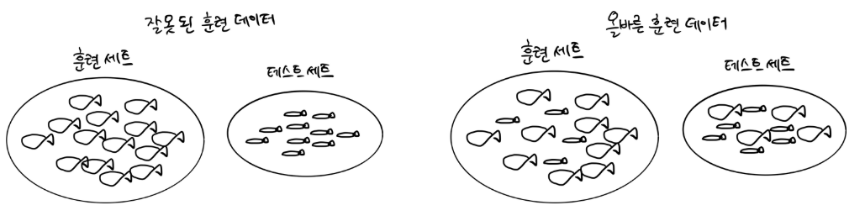
  


In [ ]:
# 넘파이는 파이썬의 대표적인 배열 라이브러리 -> 고차원배열을 손쉽게 조작
# https://wikidocs.net/193543

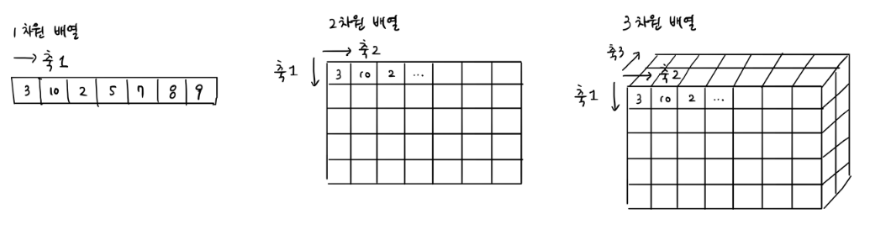

In [8]:
import numpy as np

input_arr = np.array(fish_data)      # 요소의 배열(49개)
target_arr = np.array(fish_target)   # 정답의 배열(49개)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [9]:
print(target_arr) # 1:도미, 0:빙어

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
# 훈련용 데이터는 49개의 객체와 2개의 특성(길이, 무게)를 가지고 있다.

# 배열의 크기를 알려주는 메서드 .shape
print(input_arr.shape) # (샘플수, 특성수=길이,무게)

(49, 2)


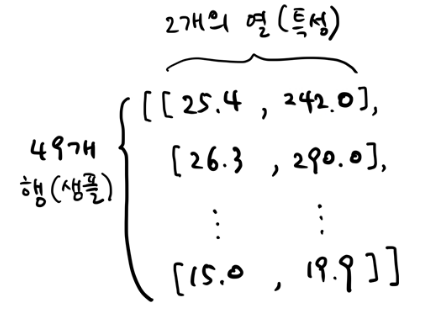

In [12]:
# 넘파이는 랜덤하게 샘플을 섞어 사용할 수 있다.
np.random.seed(42) # .seed는 랜덤하게 섞는 기준을 정해서 수업시간에 결과가 같이 나옴
index = np.arange(49) # 0~48까지 1씩 증가하는 배열
np.random.shuffle(index) # 주어진 배열을 무작위로 섞음
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [14]:
# 전체데이터를 훈련세트와 테스트세트로 나누어 보자
# 넘파이는 슬라이싱 외의 배열 인덱싱이란 기능을 제공
# 배열 인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스로 한 번에 여러 개 원소를 선택할 수 있음
print(input_arr[[1,3]]) # 두번째와 네번째 샘플 선택


[[ 26.3 290. ]
 [ 29.  363. ]]


In [15]:
# 비슷한 방법으로 리스트 대신 배열을 인덱스로 전달 할 수 있음 (.fit)
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [16]:
print(input_arr[13], train_input[0])
#     넘파이랜덤인덱스, 처음만든인덱스
# 초기만든 0번값이 13번 인덱스로 랜덤 처리


[ 32. 340.] [ 32. 340.]


In [19]:
# 나머지 14개를 테스트 세트로 만들고 35~ 마지막까지 테스트용(.score)
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
# 이렇게 처리하면 샘플링 편향을 처리하기 위해서 랜덤하게 배치

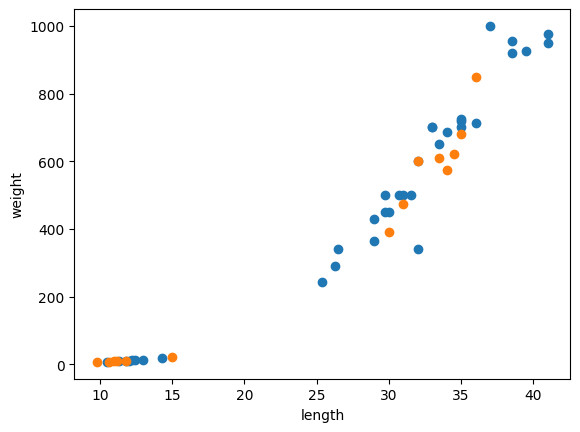

In [20]:
# 차트로 보기

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) # 훈련용 데이터셋(파란색)
plt.scatter(test_input[:,0], test_input[:,1]) # 테스트용 데이터셋(주황)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 훈련용과 테스트용이 구분 됨

In [21]:
# 전처리된 데이터를
kn.fit(train_input, train_target) # 파란색
kn.score(test_input, test_target) # 주황색
# 훈련한 것이 테스트로 보니 100%로 판단

1.0

In [22]:
# 추가 데이터로 확인
kn.predict(test_input) # 훈련이 끝난 값에 진짜 테스트 값을 적용
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [23]:
print(test_input)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


In [24]:
kn.predict([[25,150]]) # 길이가 25이고 무게가 150인데 도미가 아닌 빙어로 나옴

array([0])